In [ ]:
Q. 5. FFT vs DFT

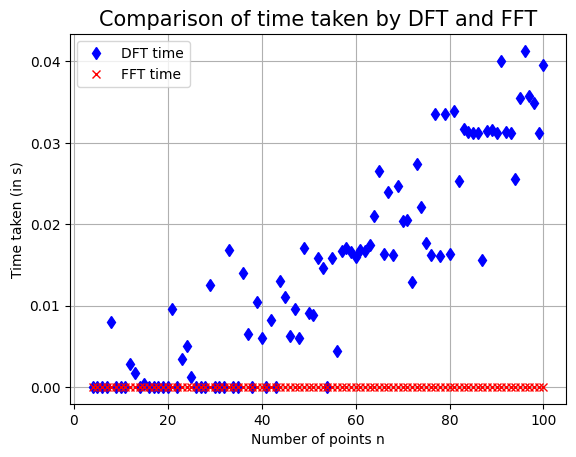

In [1]:
import numpy as np
import numpy.fft as ft
import matplotlib.pyplot as plt
import time

def dft(x):
    """
    Compute the Discrete Fourier Transform (DFT) of a signal using direct computation.
    
    Parameters:
    x (array-like): Input signal
    
    Returns:
    array: DFT of the input signal
    """
    N = len(x)
    ft_x = np.zeros(N, dtype='complex')
    
    for q in range(N):
        for p in range(N):
            ft_x[q] += x[p] * np.exp(-1.0j * 2.0 * np.pi * p * q / N)
        ft_x[q] *= (1.0 / np.sqrt(N))
    
    return ft_x

# Generate values of n from 4 to 100
n_values = np.arange(4, 101, 1)

# Arrays to store time measurements
t_dft = np.zeros_like(n_values, dtype=np.float64)
t_fft = np.zeros_like(n_values, dtype=np.float64)

# Measure time taken for both DFT and FFT for each value of n
for i, n in enumerate(n_values):
    x = np.linspace(1.0, n, n)
    
    # Time measurement for DFT
    start_time = time.time()
    dft(x)
    t_dft[i] = time.time() - start_time
    
    # Time measurement for FFT
    start_time = time.time()
    ft.fft(x)
    t_fft[i] = time.time() - start_time

# Plotting the time taken by DFT and FFT as a function of n
plt.plot(n_values, t_dft, 'bd', label="DFT time")  # 'bd' indicates blue diamond markers
plt.plot(n_values, t_fft, 'rx', label="FFT time")   # 'rx' indicates red X markers
plt.title("Comparison of time taken by DFT and FFT", size=15)
plt.xlabel("Number of points n")
plt.ylabel("Time taken (in s)")
plt.legend()
plt.grid()
plt.show()
